In [ ]:
#Bibliotecas
import networkx as nx
import numpy as np
from heapq import heapify, heappop, heappush
import matplotlib.pyplot as plt

In [ ]:
#1) Gerar um grafo ponderado aleatório
G = nx.gnm_random_graph(10, 35, seed=None, directed=False)
weights = dict()

for e in G.edges():
    weight = np.random.randint(1, 15)
    weights[e] = weight
print(weights)
nx.set_edge_attributes(G, weights, "weight")




{(0, 1): 5, (0, 6): 4, (0, 8): 10, (0, 7): 9, (0, 9): 11, (0, 5): 14, (0, 2): 2, (1, 7): 14, (1, 3): 5, (1, 5): 2, (1, 9): 10, (1, 6): 4, (1, 2): 2, (1, 8): 4, (2, 8): 13, (2, 9): 12, (2, 5): 2, (2, 4): 6, (2, 6): 10, (2, 3): 8, (3, 9): 13, (3, 7): 12, (3, 4): 6, (3, 6): 1, (4, 6): 10, (4, 8): 4, (5, 7): 9, (5, 6): 13, (5, 9): 8, (5, 8): 13, (6, 9): 9, (6, 8): 1, (7, 8): 5, (7, 9): 5, (8, 9): 13}


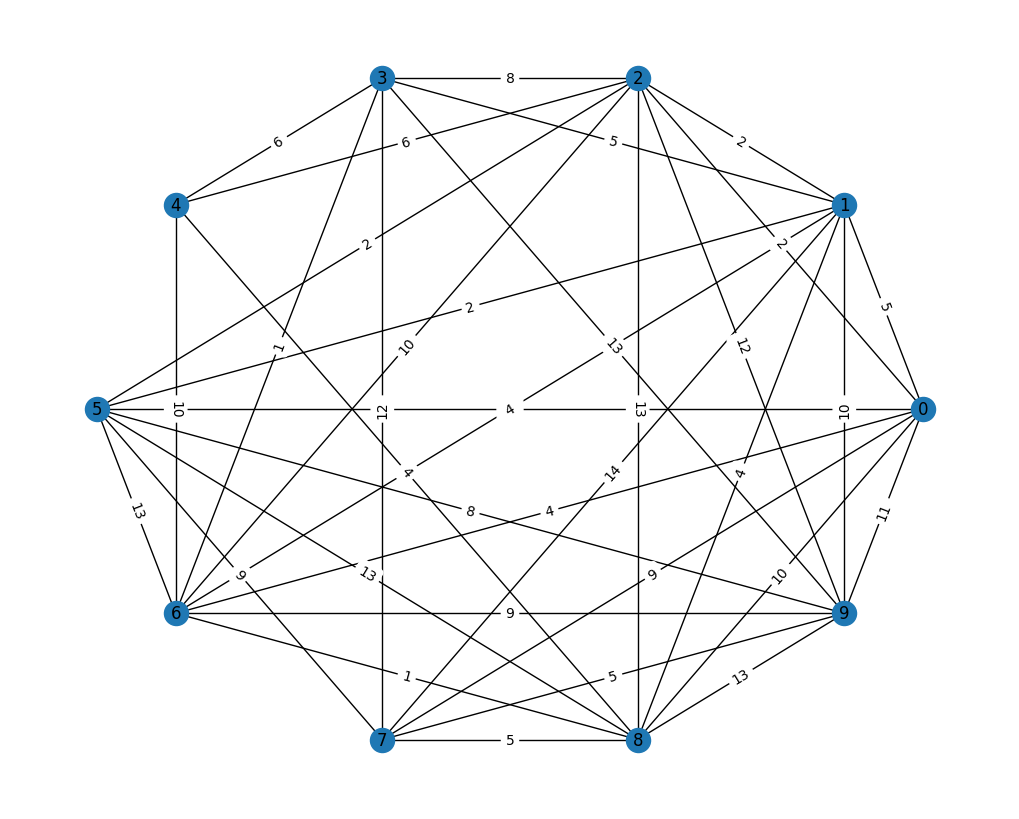

In [ ]:
#2) Plotar o gráfico de forma agradável
layout = nx.circular_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=layout, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=weights)
plt.show()


In [ ]:
#3 e 4) Dijkstra escolhendo vértice inicial
s = int(input('Vertice origem(0 a 9):'))
d = {}
for vertice in G.nodes():
  d[vertice] = float('inf')
d[s] = 0

#inicializar fila prioridade
Q = [(0, s)]
heapify(Q)

anteriores = {}

while Q:
  dist_u, u = heappop(Q)

  if dist_u > d[u]:
        continue

  for v in G.neighbors(u):
        weight = G[u][v].get('weight', 1)

        if d[u] + weight < d[v]:
            d[v] = d[u] + weight
            anteriores[v] = u
            heappush(Q, (d[v], v))

print("Distâncias:", d)
print("Caminho anterior:", anteriores)

Vertice origem(0 a 9):9
Distâncias: {0: 11, 1: 10, 2: 10, 3: 10, 4: 14, 5: 8, 6: 9, 7: 5, 8: 10, 9: 0}
Caminho anterior: {3: 6, 7: 9, 2: 5, 0: 9, 6: 9, 8: 7, 1: 9, 5: 9, 4: 8}


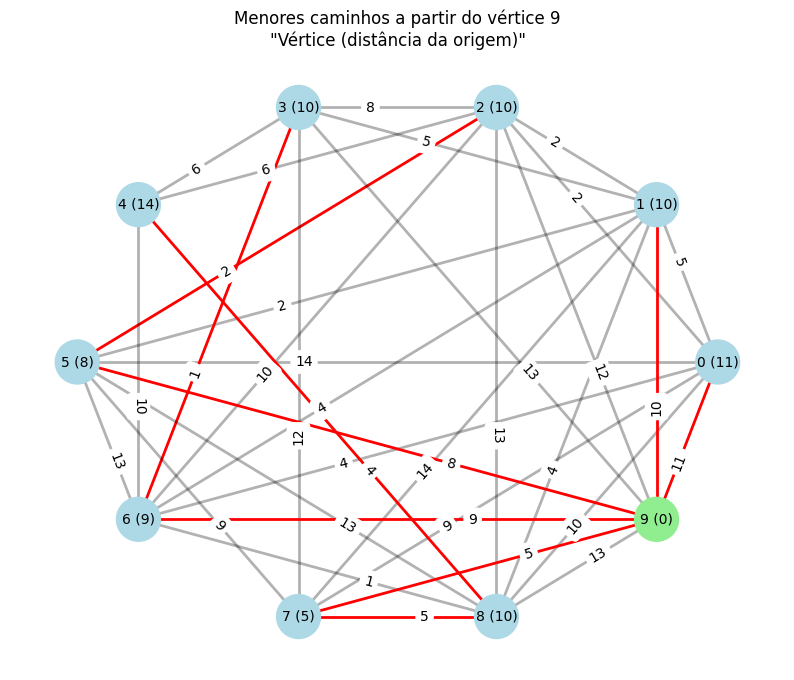

In [ ]:
# Arestas dos menores caminhos
shortest_path_edges = []
for v in anteriores:
    shortest_path_edges.append((anteriores[v], v))

# Desenhar o grafo
plt.figure(figsize=(10, 8))

# Desenhar as arestas
edge_colors = ['red' if edge in shortest_path_edges or (edge[1], edge[0]) in shortest_path_edges else 'black' for edge in G.edges()]
edge_alpha = [1 if edge in shortest_path_edges or (edge[1], edge[0]) in shortest_path_edges else 0.3 for edge in G.edges()]
nx.draw_networkx_edges(G, layout, edge_color=edge_colors, width=2, alpha = edge_alpha)

# Desenhar os nós com rótulos das distâncias
node_colors = ['lightblue' if i != s else 'lightgreen' for i in G.nodes()]
nx.draw_networkx_nodes(G, layout, node_color = node_colors, node_size=1000)
nx.draw_networkx_labels(G, layout, labels={v: f'{v} ({d[v]})' for v in G.nodes()}, font_size=10)

# Desenhar os pesos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels, label_pos=0.65)

# Exibir o grafo
plt.title(f"Menores caminhos a partir do vértice {s}\n\"Vértice (distância da origem)\"")
plt.axis('off')
plt.show()
